# ARMA

If time series data are statonary, we can use ARMA to fit this data.

This notebook explores three models: AR(AutoRegressive), MA(Moving Average), ARMA(Autoregressive–moving-average).

**Absract**:

1. First perform an ADF test, if the time series data are stationary, we can use AR, MA, ARMA models to fit the data.
2. Then plot ACF and PACF to estimate p and q.
3. Train the model.
4. Evaluate predicted values.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

In [3]:
from utils import read_bars as read_bars_tmp

# Read bars in May 2020
def read_bars(csv_file: str)->pd.DataFrame:
    TIME_BEGIN = pd.to_datetime('2020-05-01T00:00:00.000Z').tz_localize(None)
    TIME_END = pd.to_datetime('2020-06-01T00:00:00.000Z').tz_localize(None)
    bars_df = read_bars_tmp(csv_file)
    bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp_end'] < TIME_END)]
    return bars_df

In [4]:
volume_bars = read_bars('/data/bars/VolumeBar/64/VolumeBar.64.Binance.Swap.BTC_USDT.csv')

In [5]:
volume_bars

,exchange,market_type,pair,bar_type,bar_size,timestamp,timestamp_end,open,high,low,...,volume,volume_sell,volume_buy,volume_quote,volume_quote_sell,volume_quote_buy,count,count_sell,count_buy,vwap
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-01 00:00:05.431,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-01 00:00:05.431,2020-05-01 00:00:12.704,8623.610352,8627.400391,8619.839844,...,63.026,36.075,26.951000,543545.25,311130.28,543509.20,112,57,55,8624.143211
2020-05-01 00:00:12.704,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-01 00:00:12.704,2020-05-01 00:00:22.182,8627.049805,8630.309570,8621.040039,...,62.557,43.086,19.471000,539685.44,371713.06,539642.40,127,69,58,8627.099126
2020-05-01 00:00:22.195,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-01 00:00:22.195,2020-05-01 00:00:30.356,8630.379883,8630.379883,8627.219727,...,66.308,46.577,19.730999,572227.50,401960.70,572180.94,83,39,44,8629.841045
2020-05-01 00:00:30.361,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-01 00:00:30.361,2020-05-01 00:00:45.953,8629.959961,8643.139648,8629.959961,...,64.077,53.890,10.187000,553333.80,465342.12,553279.94,147,106,41,8635.451098
2020-05-01 00:00:45.973,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-01 00:00:45.973,2020-05-01 00:00:55.335,8643.719727,8647.000000,8643.379883,...,63.671,47.747,15.924000,550453.50,412787.80,550405.75,100,73,27,8645.278070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31 20:14:38.135,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-31 20:14:38.135,2020-05-31 20:15:09.582,9497.440430,9499.519531,9493.000000,...,65.386,49.905,15.481000,620963.06,473954.12,620913.20,159,96,63,9496.880984
2020-05-31 20:15:09.582,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-31 20:15:09.582,2020-05-31 20:16:54.003,9499.519531,9499.519531,9493.259766,...,63.064,26.372,36.692000,598917.60,250470.56,598891.25,234,112,122,9496.980845
2020-05-31 20:16:54.003,Binance,Swap,BTC_USDT,VolumeBar,64,2020-05-31 20:16:54.003,2020-05-31 20:18:15.408,9493.019531,9499.009766,9492.040039,...,64.962,18.023,46.939000,616793.40,171161.27,616775.40,157,86,71,9494.679967


### 1.1 Plot price

Text(0.5, 1.0, 'Price')

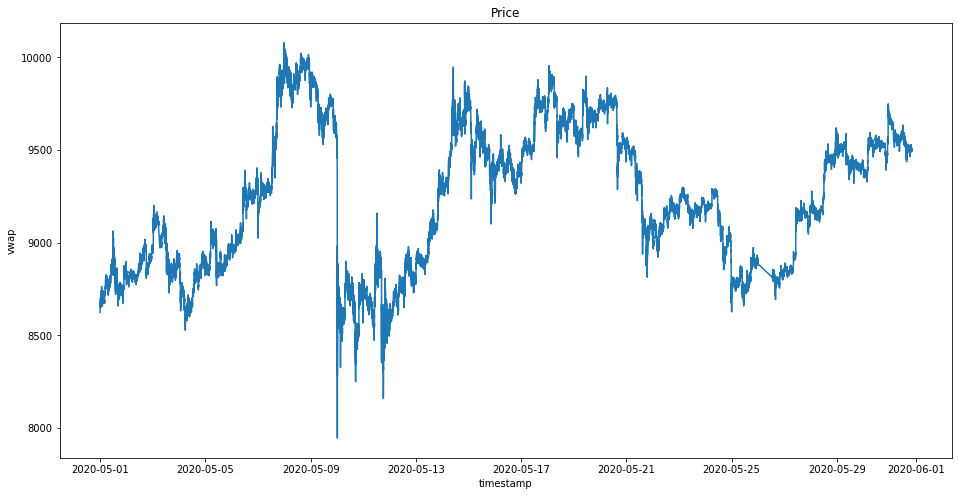

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=volume_bars.index, y=volume_bars['vwap'], ax=ax).set_title('Price')

### 1.2 Plot price diff

In [7]:
price_diffs = volume_bars['vwap'].diff().dropna().rename('price_diff')

In [8]:
price_diffs.describe(percentiles=[0.5, 0.95])

count    182942.000000
mean          0.004818
std           3.968258
min        -100.373737
50%           0.011803
95%           5.834531
max         460.239003
Name: price_diff, dtype: float64

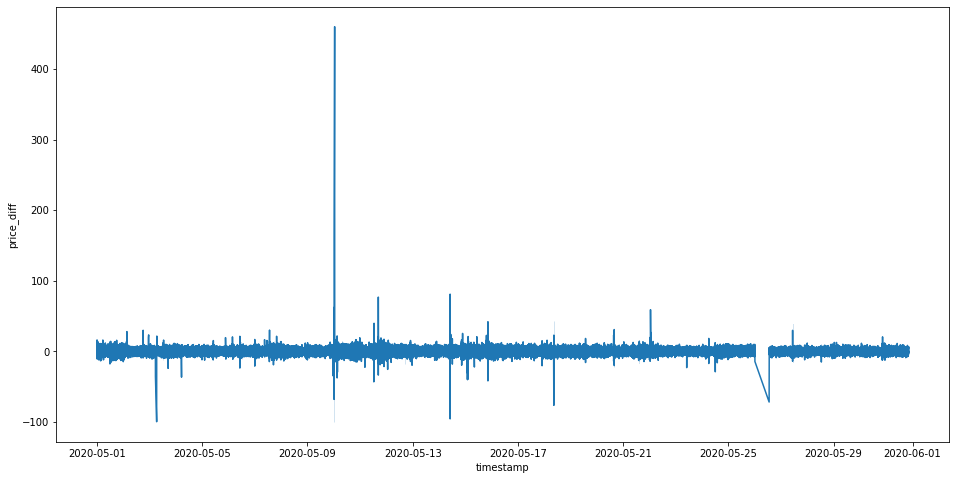

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=price_diffs.index, y=price_diffs, ax=ax)

### 1.3 ADF test

In [10]:
adf_result = ADF(price_diffs)

In [11]:
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Used lag: %f' % adf_result[2])
print('Number of observations: %f' % adf_result[3])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -67.898525
p-value: 0.000000
Used lag: 38.000000
Number of observations: 182903.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In the output above, we can see that ADF statistic value of `-14.685279` is less than the value of `-3.435` at 1%. Besides, the p-value is less than `0.05`. Both values reject the null hypothesis, therefore price diffs are stationary.

## 2. Plot ACF and PACF

Usually we use partial autocorrelation to estimate the order `p` of `AR(p)` model and use autocorrelation to estimate the order `q` of `MA(q)` model, so let's first plot ACF and PACF.

Rules to identify the orders of AR or MA:

* The lag beyond which the PACF cuts off is the indicated order of AR.
* The lag beyond which the ACF cuts off is the indicated order of MA.

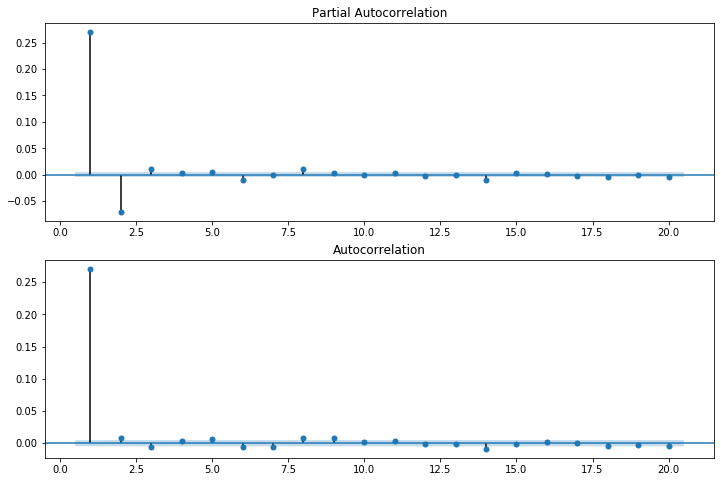

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(price_diffs, lags=20, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(price_diffs.values.squeeze(), lags=20, zero=False, ax=ax2)

* The PACF shuts off after lag 1.
* The ACF shuts off after lag 1.

So we can tentatively set `p=1` and `q=1`.

## 2. Train the model

In [13]:
# ar1_model = sm.tsa.arima.ARIMA(price_diffs, order=(1, 0, 0)).fit() # AR1
# ma1_model = sm.tsa.arima.ARIMA(price_diffs, order=(0, 0, 1)).fit() # MA1
arma_model = sm.tsa.arima.ARIMA(price_diffs, order=(1, 0, 1)).fit()  # ARMA(1,1)

In [14]:
# arma_model.summary()

In [15]:
print(arma_model.aic, arma_model.bic, arma_model.hqic)

1008692.0885261969 1008732.5562239637 1008704.045351713


In [16]:
print(arma_model.params)

const      0.004821
ar.L1      0.043380
ma.L1      0.246520
sigma2    14.523528
dtype: float64


## 3. How dows our model fit the data?

Let's do a white noise test on the residuals time series data. If the residuals are white noise, which means all information have been extracted sufficiently by the model.

### 3.1 Are there any autocorrelations in residuals?

In [17]:
sm.stats.durbin_watson(arma_model.resid.values)

1.9998296309102466

The Durbin–Watson statistic is very close to 2, and 2 indicates no autocorrelation.

### 3.2 Plot ACF and PACF of residuals

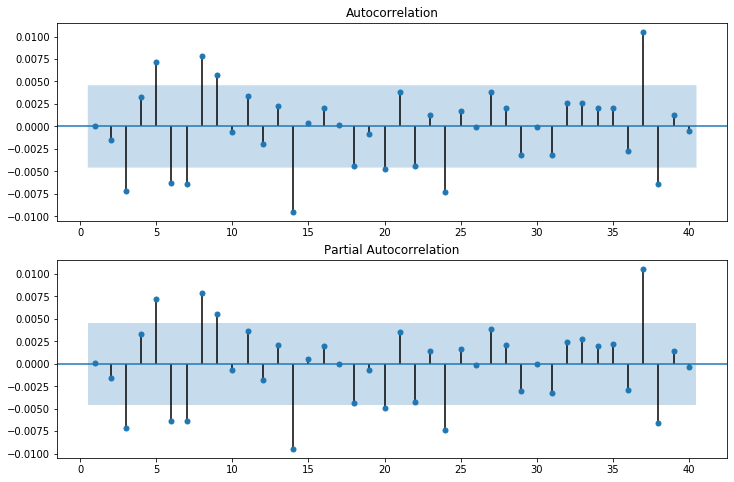

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_model.resid.values.squeeze(), lags=40, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_model.resid, lags=40, zero=False, ax=ax2)

The two figures above show that autocorrelations are very small at almost all lags, which means residuals are almost white noise, the model has extracted information sufficiently.

### 3.3 Ljung-Box test

In [19]:
sm.stats.acorr_ljungbox(arma_model.resid.values, lags=1, return_df=True)

,lb_stat,lb_pvalue
1,0.001245,0.971855


The p-value of Ljung-Box test is much greater than 0.05, which indicates that residuals are white noise.

**Conclusion: The residuals are white noise, which means our model fits the data quite well.**

## 4. Plot predicted values

In [20]:
predicted_price_diffs = arma_model.predict(
    start=price_diffs.index[0],
    end=price_diffs.index[-1],
    dynamic=True,
)

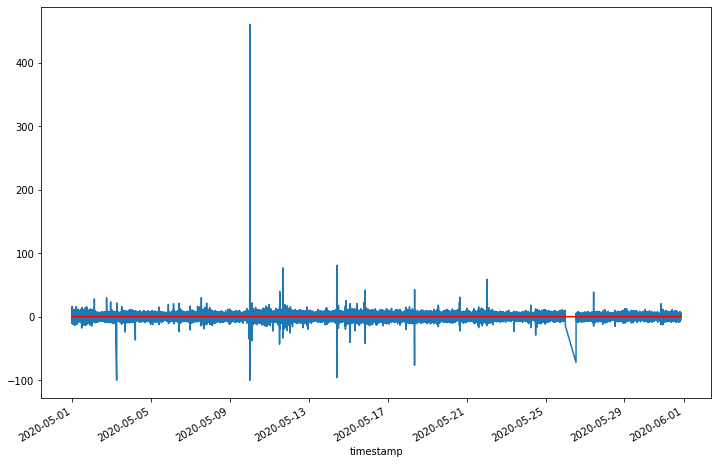

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
price_diffs.plot(ax=ax)
predicted_price_diffs.plot(ax=ax, style='r')

## References

* [Everything you can do with a time series | Kaggle](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
* [Time Series Forecast Case Study with Python: Monthly Armed Robberies in Boston](https://machinelearningmastery.com/time-series-forecast-case-study-python-monthly-armed-robberies-boston/)
* [How does ACF & PACF identify the order of MA and AR terms? - Cross Validated](https://stats.stackexchange.com/q/281666/21732)
* [Rules for identifying ARIMA models](https://people.duke.edu/~rnau/arimrule.htm)
* [Identifying the numbers of AR or MA terms in an ARIMA model](https://people.duke.edu/~rnau/411arim3.htm)
* [Autoregressive–moving-average model - Wikipedia](https://en.wikipedia.org/wiki/Autoregressive–moving-average_model)
* [Autoregressive Moving Average (ARMA): Sunspots data - statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html)
* [statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)